In [1]:
#Imports
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
data10 =  pd.read_csv('2010plays.csv')
data10.quarter.unique()

/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (10,60,71,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


array([1, 2, 3, 4, 5])

In [3]:
#Clean data table for penalty graph

data11 =  pd.read_csv('2013plays.csv')
data = data11[["penalty", "qtr_time_remain", "quarter"]]
data["isPenalty"] = data11.penalty.notnull().values
quart = []
for i in range(len(data[["quarter"]].values)):
    val = data[["quarter"]].values[i][0]
    val = str(val)
    quart.append(val.replace(".0", ""))
data["quarters"] = quart
data = data[data.quarters != "OT"]
data["quarters"] = data["quarters"].astype(int)
data = data.dropna()
def get_sec(s):
    hold = []
    for i in range(len(s)):
        entry = str(s.values[i][0])
        l = entry.split(':')
        result = int(l[0]) * 60 + int(l[1])
        hold.append(result)
    ret = hold
    return ret
data["qtr_time_remain"] = get_sec(data[["qtr_time_remain"]])
data["time_elapsed"] = data["quarters"]*15.0*60.0 - data["qtr_time_remain"]
data.head()



/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (13,25,58) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,penalty,qtr_time_remain,quarter,isPenalty,quarters,time_elapsed
4,Offensive Holding,807,1.0,True,1,93
6,False Start,746,1.0,True,1,154
40,Defensive Pass Interference,740,2.0,True,2,1060
41,Encroachment,732,2.0,True,2,1068
56,Unnecessary Roughness,406,2.0,True,2,1394


In [4]:
# Functions for penalty plot and clean
def get_sec(dfseries):
    hold = []
    for i in range(len(dfseries)):
        entry = str(dfseries.values[i][0])
        l = entry.split(':')
        result = int(l[0]) * 60 + int(l[1])
        hold.append(result)
    ret = hold
    return ret

def clean_penalty(filename):
    filename = str(filename)
    data_raw =  pd.read_csv(filename) 
    data = data_raw[["penalty", "qtr_time_remain", "quarter"]]
    data["isPenalty"] = data_raw.penalty.notnull().values
    quart = []
    for i in range(len(data[["quarter"]].values)):
        val = data[["quarter"]].values[i][0]
        val = str(val)
        quart.append(val.replace(".0", ""))
    data["quarters"] = quart
    data = data[data.quarters != "OT"]
    data["quarters"] = data["quarters"].astype(int)
    data = data.dropna()
    data["qtr_time_remain"] = get_sec(data[["qtr_time_remain"]])
    data["time_elapsed"] = data["quarters"]*15.0*60.0 - data["qtr_time_remain"]
    return data

def plot_penalty(data):
    ax = plt.subplot(111)
    ax.hist(data["time_elapsed"].values, bins=20, color="c")
    ax.set_title("Penalty Progression")
    ax.set_xlabel("Time elapsed (seconds)")
    ax.set_ylabel("Frequency")
    ax.set_xlim(0,3600)
    ax.axvline(15*60, color="b", label = "quarter end", ls = '--')
    ax.axvline(30*60, color="b", ls = '--')
    ax.axvline(45*60, color="b", ls = '--')
    ax.legend()
    ax.grid(False)
    sns.despine()
    return ax

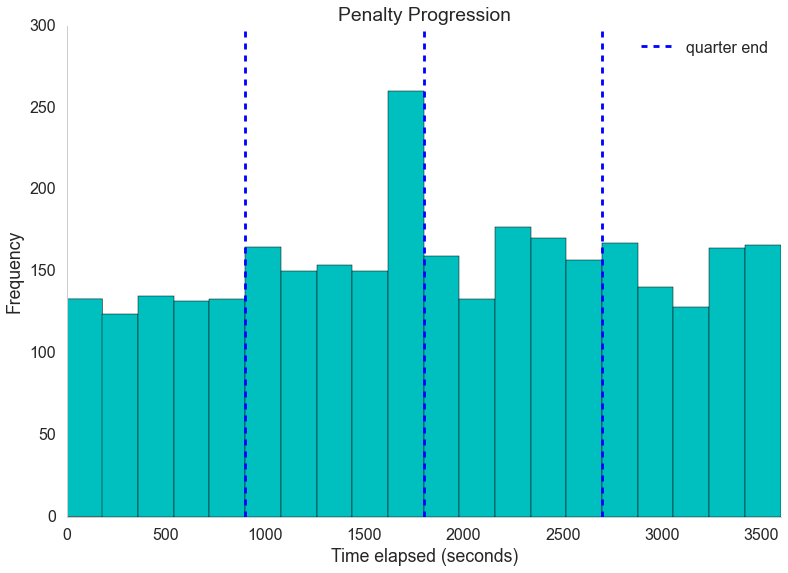

In [5]:
#Plot of penalty graph
plt.hist(data["time_elapsed"].values, bins=20, color="c")
plt.title("Penalty Progression")
plt.xlabel("Time elapsed (seconds)")
plt.ylabel("Frequency")
plt.xlim(0,3600)
plt.axvline(15*60, color="b", label = "quarter end", ls = '--')
plt.axvline(30*60, color="b", ls = '--')
plt.axvline(45*60, color="b", ls = '--')
plt.legend()
plt.grid(False)
sns.despine()

/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (10,71,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


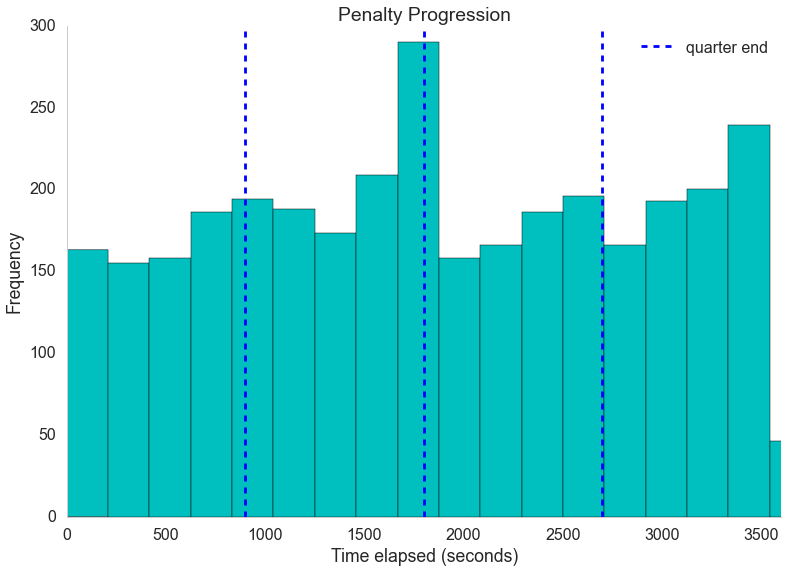

In [26]:
data_test = clean_penalty("2011plays.csv")
plot_penalty(data_test)

In [7]:
data11.head(2)

,blocked,bsID,challengeUpheld,challenged,challenger,detail,down,exp_pts_after,exp_pts_before,fairCatch,fairCatcher,fgBlocker,fgDist,fgGood,fgKicker,forcer,fumbRecFieldside,fumbRecYdLine,fumbRetYds,fumbler,home_wp,intRetYds,intYdLine,interceptor,isComplete,isFieldGoal,isKickoff,isKneel,isPass,isPresapPenalty,isPunt,isRun,isSpike,isTD,isTimeout,isTwoPoint,isXP,kicker,kneelQB,kneelYds,koKicker,koRetYds,koReturner,koYds,lateral,location,muffRecoverer,muffedBy,muffedCatch,oob,passLoc,passer,pbp_score_aw,pbp_score_hm,penDeclined,penOn,penYds,penalty,puntBlockRecoverer,puntBlockRetYds,puntBlocker,puntRetYds,puntReturner,puntYds,punter,qtr_time_remain,quarter,rawMuffRet,recoverer,rushDir,rusher,sackYds,sacker1,sacker2,spikeQB,tackler1,tackler2,target,timeoutNum,timeoutTeam,touchback,twoPointSuccess,xpGood,yds,yds_to_go
0,False,201309080ram,False,False,NaN,"feelyjay01 kicks off 62 yards, returned by Cun...",NaN,-0.54,0.00,False,NaN,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,61.8,NaN,NaN,NaN,False,False,True,NaN,False,False,False,False,NaN,False,False,False,False,NaN,NaN,NaN,feelyjay01,21,CunnBe01,62,False,CRD 35,False,False,False,False,NaN,NaN,0,0,False,NaN,0,NaN,False,0,False,0,NaN,NaN,NaN,15:00,1.0,False,NaN,NaN,NaN,False,NaN,False,NaN,ArenJa99,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
1,False,201309080ram,False,False,NaN,BradSa00 pass complete short right to KendLa00...,1,1.20,0.54,False,NaN,False,NaN,False,NaN,NaN,NaN,0,0.0,NaN,63.6,NaN,NaN,NaN,True,False,False,NaN,True,False,False,False,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,RAM 24,False,False,False,False,SR,BradSa00,0,0,False,NaN,0,NaN,False,0,False,0,NaN,NaN,NaN,14:53,1.0,False,NaN,NaN,NaN,False,NaN,False,NaN,BrinJa99,NaN,KendLa00,NaN,NaN,False,False,False,10,10


In [8]:
data11.columns

Index([u'blocked', u'bsID', u'challengeUpheld', u'challenged', u'challenger', u'detail', u'down', u'exp_pts_after', u'exp_pts_before', u'fairCatch', u'fairCatcher', u'fgBlocker', u'fgDist', u'fgGood', u'fgKicker', u'forcer', u'fumbRecFieldside', u'fumbRecYdLine', u'fumbRetYds', u'fumbler', u'home_wp', u'intRetYds', u'intYdLine', u'interceptor', u'isComplete', u'isFieldGoal', u'isKickoff', u'isKneel', u'isPass', u'isPresapPenalty', u'isPunt', u'isRun', u'isSpike', u'isTD', u'isTimeout',
       u'isTwoPoint', u'isXP', u'kicker', u'kneelQB', u'kneelYds', u'koKicker', u'koRetYds', u'koReturner', u'koYds', u'lateral', u'location', u'muffRecoverer', u'muffedBy', u'muffedCatch', u'oob', u'passLoc', u'passer', u'pbp_score_aw', u'pbp_score_hm', u'penDeclined', u'penOn', u'penYds', u'penalty', u'puntBlockRecoverer', u'puntBlockRetYds', u'puntBlocker', u'puntRetYds', u'puntReturner', u'puntYds', u'punter', u'qtr_time_remain', u'quarter', u'rawMuffRet', u'recoverer', u'rushDir',
       u'rusher', 

In [9]:
#Function for pass clean
def clean_pass(data11):
    data2 = data11[["isPass", "qtr_time_remain", "quarter"]]
    quart = []
    for i in range(len(data2[["quarter"]].values)):
        val = data2[["quarter"]].values[i][0]
        val = str(val)
        quart.append(val.replace(".0", ""))
    data2["quarters"] = quart
    data2 = data2[data2.quarters != "OT"]
    data2["quarters"] = data2["quarters"].astype(int)
    data2 = data2.dropna()
    data2 = data2[data2["isPass"] == True]
    data2["qtr_time_remain"] = get_sec(data2[["qtr_time_remain"]])
    data2["time_elapsed"] = data2["quarters"]*15.0*60.0 - data2["qtr_time_remain"]
    return data2

def plot_pass(data):
    ax = plt.subplot(111)
    ax.hist(data["time_elapsed"].values, bins=20, color="g")
    ax.set_title("Pass Progression")
    ax.set_xlabel("Time elapsed (seconds)")
    ax.set_ylabel("Frequency")
    ax.set_xlim(0,3600)
    ax.axvline(15*60, color="b", label = "quarter end", ls = '--')
    ax.axvline(30*60, color="b", ls = '--')
    ax.axvline(45*60, color="b", ls = '--')
    ax.legend()
    ax.grid(False)
    sns.despine()
    return ax

/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


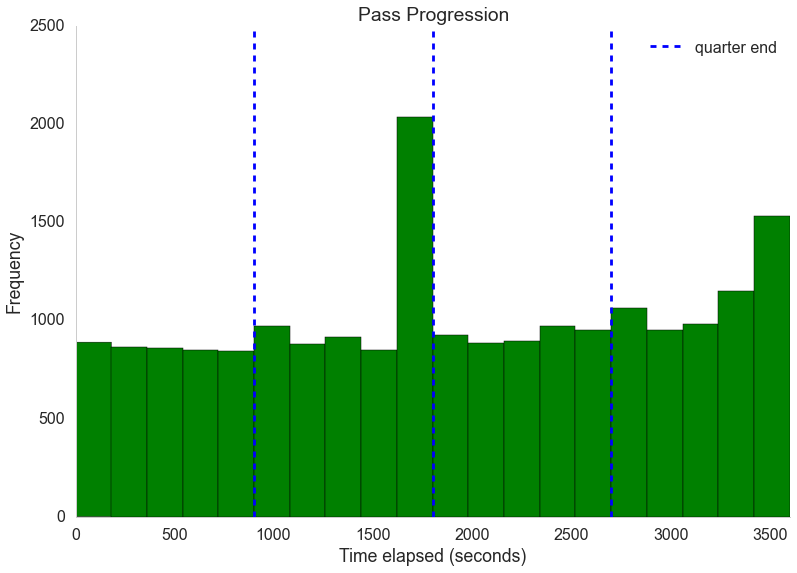

In [10]:
passdf = clean_pass(data11)
plot_pass(passdf)

In [11]:
def clean_run(data11):
    data2 = data11[["isRun", "qtr_time_remain", "quarter"]]
    quart = []
    for i in range(len(data2[["quarter"]].values)):
        val = data2[["quarter"]].values[i][0]
        val = str(val)
        quart.append(val.replace(".0", ""))
    data2["quarters"] = quart
    data2 = data2[data2.quarters != "OT"]
    data2["quarters"] = data2["quarters"].astype(int)
    data2 = data2.dropna()
    data2 = data2[data2["isRun"] == True]
    data2["qtr_time_remain"] = get_sec(data2[["qtr_time_remain"]])
    data2["time_elapsed"] = data2["quarters"]*15.0*60.0 - data2["qtr_time_remain"]
    return data2

def plot_run(data):
    ax = plt.subplot(111)
    ax.hist(data["time_elapsed"].values, bins=20, color="m", alpha=0.8)
    ax.set_title("Run Progression")
    ax.set_xlabel("Time elapsed (seconds)")
    ax.set_ylabel("Frequency")
    ax.set_xlim(0,3600)
    ax.axvline(15*60, color="k", label = "quarter end", ls = '--')
    ax.axvline(30*60, color="k", ls = '--')
    ax.axvline(45*60, color="k", ls = '--')
    ax.legend()
    ax.grid(False)
    sns.despine()
    return ax

/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


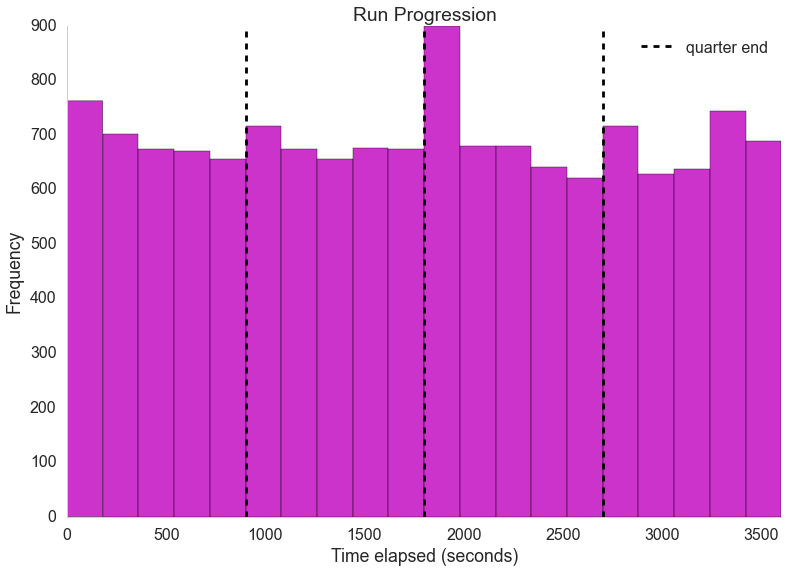

In [12]:
rundf = clean_run(data11)
plot_run(rundf)

In [13]:
inputs = ["bsID", "down", "location", "pbp_score_aw", "pbp_score_hm", "qtr_time_remain", "quarter", "timeoutNum", "timeoutTeam", "yds_to_go"]

In [14]:
dftest = data11[["down", "location", "isPass","isComplete", "isRun", "passLoc", "rushDir", "qtr_time_remain", "quarter", "rusher", "yds_to_go", "passer", "pbp_score_aw", "pbp_score_hm", "timeoutNum", "timeoutTeam"]]
dftest.head(2)

,down,location,isPass,isComplete,isRun,passLoc,rushDir,qtr_time_remain,quarter,rusher,yds_to_go,passer,pbp_score_aw,pbp_score_hm,timeoutNum,timeoutTeam
0,NaN,CRD 35,False,False,False,NaN,NaN,15:00,1.0,NaN,NaN,NaN,0,0,NaN,NaN
1,1,RAM 24,True,True,False,SR,NaN,14:53,1.0,NaN,10,BradSa00,0,0,NaN,NaN


In [15]:
dftest[dftest.isRun == True].rushDir.unique()

array(['M', 'RT', 'LT', 'LE', 'LG', nan, 'RG', 'RE'], dtype=object)

In [16]:
def isPassSM(df):
    if df["isPass"]==True and df["passLoc"] == "SM":
        num = 1
    else:
        num = 0
    return num

def isPassSL(df):
    if df["isPass"]==True and df["passLoc"] == "SL":
        num = 1
    else:
        num = 0
    return num

def isPassSR(df):
    if df["isPass"]==True and df["passLoc"] == "SR":
        num = 1
    else:
        num = 0
    return num

def isPassDM(df):
    if df["isPass"]==True and df["passLoc"] == "DM":
        num = 1
    else:
        num = 0
    return num

def isPassDR(df):
    if df["isPass"]==True and df["passLoc"] == "DR":
        num = 1
    else:
        num = 0
    return num

def isPassDL(df):
    if df["isPass"]==True and df["passLoc"] == "DL":
        num = 1
    else:
        num = 0
    return num

def isRunLE(df):
    if df["isRun"]==True and df["rushDir"] == "LE":
        num = 1
    else:
        num = 0
    return num

def isRunRE(df):
    if df["isRun"]==True and df["rushDir"] == "RE":
        num = 1
    else:
        num = 0
    return num

def isRunM(df):
    if df["isRun"]==True and df["rushDir"] == "M":
        num = 1
    else:
        num = 0
    return num

def isRunLT(df):
    if df["isRun"]==True and df["rushDir"] == "LT":
        num = 1
    else:
        num = 0
    return num

def isRunRT(df):
    if df["isRun"]==True and df["rushDir"] == "RT":
        num = 1
    else:
        num = 0
    return num

def isRunRG(df):
    if df["isRun"]==True and df["rushDir"] == "RG":
        num = 1
    else:
        num = 0
    return num

def isRunLG(df):
    if df["isRun"]==True and df["rushDir"] == "LG":
        num = 1
    else:
        num = 0
    return num

#Create Pass Columns
dftest["isPassSM"] = dftest.apply(isPassSM, axis=1)
dftest["isPassSL"] = dftest.apply(isPassSL, axis=1)
dftest["isPassSR"] = dftest.apply(isPassSR, axis=1)
dftest["isPassDM"] = dftest.apply(isPassDM, axis=1)
dftest["isPassDL"] = dftest.apply(isPassDL, axis=1)
dftest["isPassDR"] = dftest.apply(isPassDR, axis=1)
dftest["isPassS"] = dftest["isPassSM"] + dftest["isPassSL"] + dftest["isPassSR"]
dftest["isPassD"] = dftest["isPassDM"] + dftest["isPassDL"] + dftest["isPassDR"]

#Create Run Columns
dftest["isRunLE"] = dftest.apply(isRunLE, axis=1)
dftest["isRunRE"] = dftest.apply(isRunRE, axis=1)
dftest["isRunRT"] = dftest.apply(isRunRT, axis=1)
dftest["isRunLT"] = dftest.apply(isRunLT, axis=1)
dftest["isRunRG"] = dftest.apply(isRunRG, axis=1)
dftest["isRunLG"] = dftest.apply(isRunLG, axis=1)
dftest["isRunM"] = dftest.apply(isRunM, axis=1)
dftest.head()



/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http

,down,location,isPass,isComplete,isRun,passLoc,rushDir,qtr_time_remain,quarter,rusher,yds_to_go,passer,pbp_score_aw,pbp_score_hm,timeoutNum,timeoutTeam,isPassSM,isPassSL,isPassSR,isPassDM,isPassDL,isPassDR,isPassS,isPassD,isRunLE,isRunRE,isRunRT,isRunLT,isRunRG,isRunLG,isRunM
0,NaN,CRD 35,False,False,False,NaN,NaN,15:00,1.0,NaN,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,RAM 24,True,True,False,SR,NaN,14:53,1.0,NaN,10,BradSa00,0,0,NaN,NaN,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,1,RAM 34,False,False,True,NaN,M,14:32,1.0,RichDa00,10,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,RAM 40,True,True,False,SR,NaN,13:56,1.0,NaN,4,BradSa00,0,0,NaN,NaN,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1,RAM 45,True,True,False,SR,NaN,13:27,1.0,NaN,10,BradSa00,0,0,NaN,NaN,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [17]:
len(dftest[dftest["isComplete"]==True]) +  len(dftest[dftest.isRun==True][dftest.rushDir != np.nan])

/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


25316

In [18]:
n = float(len(dftest.passLoc.dropna()) +  len(dftest["rushDir"].dropna()))
res_dict = {
    "isPassSL": dftest.isPassSL.sum()/n,
    "isPassSM": dftest.isPassSM.sum()/n,
    "isPassSR": dftest.isPassSR.sum()/n,
    "isPassDL": dftest.isPassDL.sum()/n,
    "isPassDM": dftest.isPassDM.sum()/n,
    "isPassDR": dftest.isPassDR.sum()/n,
    "isRunLE": dftest.isRunLE.sum()/n,
    "isRunLT": dftest.isRunLT.sum()/n,
    "isRunLG": dftest.isRunLG.sum()/n,
    "isRunM": dftest.isRunM.sum()/n,
    "isRunRG": dftest.isRunRG.sum()/n,
    "isRunRT": dftest.isRunRT.sum()/n,
    "isRunRE": dftest.isRunRE.sum()/n
    }


In [19]:
res_dict

{'isPassDL': 0.041584837432588298,
 'isPassDM': 0.026123008821970758,
 'isPassDR': 0.046323139748745287,
 'isPassSL': 0.16995542255057827,
 'isPassSM': 0.11156831572056486,
 'isPassSR': 0.18756819102839864,
 'isRunLE': 0.054209919261822379,
 'isRunLG': 0.047040119704479563,
 'isRunLT': 0.051497864646653575,
 'isRunM': 0.11674304061847314,
 'isRunRE': 0.04273823997007388,
 'isRunRG': 0.052620094142585491,
 'isRunRT': 0.052027806353065871}

In [20]:
np.array(res_dict.values()).sum()

1.0

In [21]:
dfinp = data11[inputs]
dfinp.head()

,bsID,down,location,pbp_score_aw,pbp_score_hm,qtr_time_remain,quarter,timeoutNum,timeoutTeam,yds_to_go
0,201309080ram,NaN,CRD 35,0,0,15:00,1.0,NaN,NaN,NaN
1,201309080ram,1,RAM 24,0,0,14:53,1.0,NaN,NaN,10
2,201309080ram,1,RAM 34,0,0,14:32,1.0,NaN,NaN,10
3,201309080ram,2,RAM 40,0,0,13:56,1.0,NaN,NaN,4
4,201309080ram,1,RAM 45,0,0,13:27,1.0,NaN,NaN,10


In [22]:
dfinp.bsID[0][-3:].upper()

'RAM'

In [23]:
def find_home(df):
    name = dfinp.bsID[0][-3:].upper()
    return name

dfinp["home_team"] = dfinp.apply(find_home, axis=1)
dfinp.head()

/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,bsID,down,location,pbp_score_aw,pbp_score_hm,qtr_time_remain,quarter,timeoutNum,timeoutTeam,yds_to_go,home_team
0,201309080ram,NaN,CRD 35,0,0,15:00,1.0,NaN,NaN,NaN,RAM
1,201309080ram,1,RAM 24,0,0,14:53,1.0,NaN,NaN,10,RAM
2,201309080ram,1,RAM 34,0,0,14:32,1.0,NaN,NaN,10,RAM
3,201309080ram,2,RAM 40,0,0,13:56,1.0,NaN,NaN,4,RAM
4,201309080ram,1,RAM 45,0,0,13:27,1.0,NaN,NaN,10,RAM


In [24]:
dfinp.location[0][:3] == dfinp.bsID[5][-3:].upper()

False